## Chapter10: Fancy Indexing

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

### Exploring Fancy Indexing 

In [1]:
import numpy as np
np.__version__

'1.26.4'

In [3]:
rng = np.random.default_rng(seed=1701)
x = rng.integers(100,size =10)
x

array([90, 40,  9, 30, 80, 67, 39, 15, 33, 79], dtype=int64)

In [4]:
[x[3],x[7],x[2]]

[30, 15, 9]

In [7]:
ind = [3,7,4]
x[ind]

array([30, 15, 80], dtype=int64)

In [9]:
# shape reflect shape of index
ind = np.array([[3,7],
               [4,5]])
x[ind]

array([[30, 15],
       [80, 67]], dtype=int64)

In [11]:
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [13]:
row = np.array([0,1,2])
col = np.array([2,1,3])
x[row,col]

array([ 2,  5, 11])

In [15]:
x[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [17]:
# broadcasting
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

### combine indexing

In [20]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [22]:
x[2,[2,0,1]]

array([10,  8,  9])

In [24]:
x[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [26]:
# mask by true,false
mask = np.array([True, False, True, False])
x[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### example: selecting random points

In [29]:
mean = [0,0]
cov = [[1,2],
      [2,5]]
x = rng.multivariate_normal(mean, cov,100)
x.shape

(100, 2)

In [31]:
x[:10]

array([[ 0.92376172,  3.86247383],
       [ 0.66175153,  2.92566223],
       [ 0.73098106,  2.44134086],
       [-0.3297868 , -0.11668874],
       [-0.30888759,  0.8743896 ],
       [ 0.86013582,  1.64977873],
       [ 1.12535005,  3.0797069 ],
       [-1.15071385, -1.02441057],
       [ 0.08527574, -0.90798038],
       [ 0.7240915 ,  2.16337705]])

In [33]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
# plt.style.available

Text(0, 0.5, 'y var')

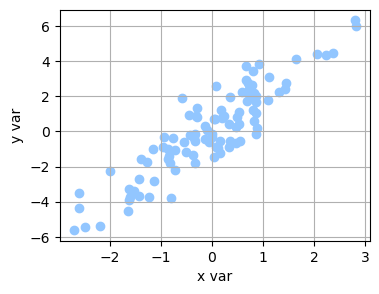

In [34]:
plt.figure(figsize=(4,3))
plt.scatter(x[:,0],x[:,1])
plt.grid(visible=True)
plt.xlabel('x var')
plt.ylabel('y var')
# plt.*?

In [36]:
indices =  np.random.choice(x.shape[0],20, replace= False) # sampling without replacement
indices

array([56, 50, 45, 40, 31,  3, 97, 85, 30, 48, 73, 78, 72, 63, 12, 60,  2,
       75, 11, 18])

In [39]:
selection =  x[indices]  # fancy indexing here
selection.shape

(20, 2)

In [41]:
x[indices,:]

array([[ 2.79594472e+00,  6.33408633e+00],
       [-5.34031981e-01, -5.85417619e-01],
       [ 5.35190376e-01,  4.47966342e-01],
       [ 7.19488278e-02,  7.02146349e-01],
       [-5.91795754e-01,  1.91761015e+00],
       [-3.29786797e-01, -1.16688738e-01],
       [-5.23767992e-02, -5.80675479e-01],
       [-2.57288282e-03, -3.39005109e-01],
       [-1.42326788e+00, -2.72306289e+00],
       [ 1.43891059e+00,  2.42258911e+00],
       [ 8.17369954e-01,  1.94401318e+00],
       [-1.26787248e+00, -1.74778269e+00],
       [ 8.59854946e-01,  2.03652405e+00],
       [ 2.23519164e+00,  4.33266160e+00],
       [ 1.51379786e-01, -1.23549790e+00],
       [-1.41393471e+00, -3.66357845e+00],
       [ 7.30981058e-01,  2.44134086e+00],
       [ 3.27979510e-01, -9.04223047e-01],
       [-1.13766512e+00, -2.80758238e+00],
       [-1.62415980e+00, -3.90121516e+00]])

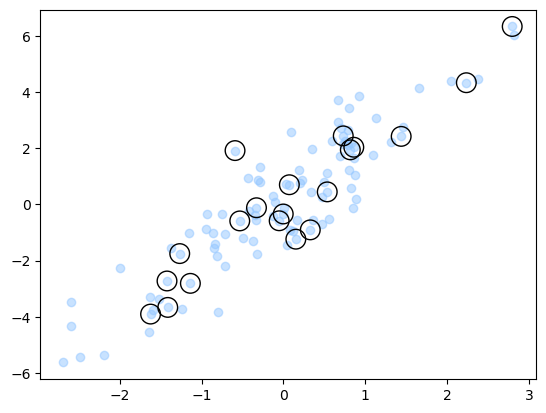

In [43]:
plt.scatter(x[:,0],x[:,1],alpha=0.5)
plt.scatter(selection[:,0],selection[:,1],
           facecolor = 'none',edgecolor='black', s=200)

### modifying value with fancy indexing

In [46]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i]=99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [48]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [50]:
# confused case

In [52]:
x =np.zeros(10)
x[[0,0]] = [4,6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [56]:
x = np.zeros(10)
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


### example: binning data

In [59]:
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)   # mean= 0, sd=1

In [61]:
# compute histogram by hand
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)  # create array with same size as input
# np.zeros(20)
# np.zeros(bins.shape[0])

In [63]:
# find appropriate bin for each x
i = np.searchsorted(bins,x)
i

array([11, 11, 11,  8, 11,  7, 13,  8, 12,  8, 11, 10, 11,  9, 13,  9,  9,
        7, 11, 11, 13, 11,  8,  8, 11, 10, 13, 12, 10, 11,  7, 15, 10,  7,
       14,  8,  9, 11, 11,  9, 10, 13, 10,  7, 13, 11, 11, 13, 11, 11,  9,
        8, 12,  9,  8, 10, 11,  8, 11,  6,  8, 11,  8,  8, 11, 12, 11,  9,
       16, 11, 11, 10, 11, 11, 13, 10,  7,  8, 11, 11,  7,  9,  9, 11, 12,
        9, 11, 12, 14,  9, 11, 12, 10,  8, 10, 10,  9, 11,  8, 15],
      dtype=int64)

In [65]:
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [67]:
# add 1 to each of these bins
np.add.at(counts,i,1)

In [69]:
counts

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  7., 15., 13., 12., 32.,  7.,
        8.,  2.,  2.,  1.,  0.,  0.,  0.])

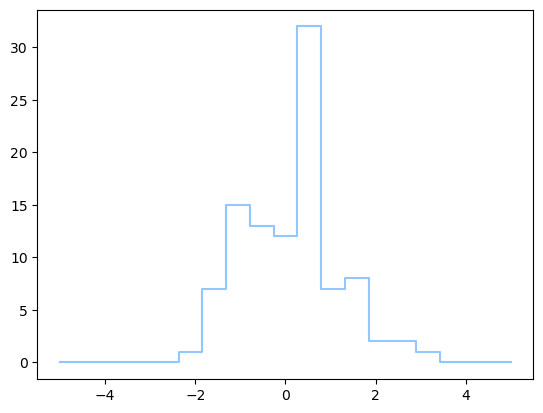

In [69]:
# plot
plt.plot(bins,counts,drawstyle='steps');

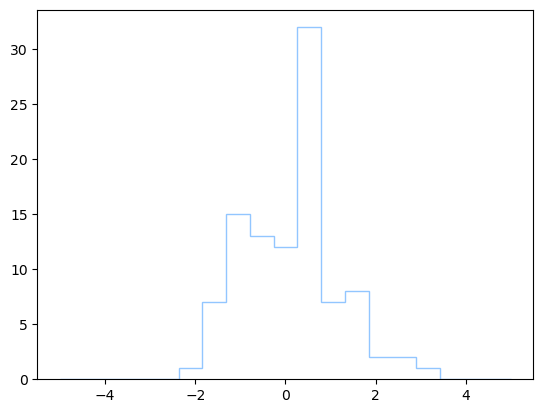

In [71]:
plt.hist(x,bins,histtype='step');